# Imports (do NOT change/add)

In [35]:
import operator

import csv
import statistics as stats
import math
import random

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Wine Dataset
Loading/analyzing a subset of the [wine dataset](http://archive.ics.uci.edu/ml/datasets/Wine)
* Overlay histograms of the two features (alcohol, ascalinity)
* Output count of points, as well as mean & sample standard deviation of the features

In [36]:
alcohol = []
ascalinity = []

with open('wine_data.csv', "r") as csvfile:
    for row in csv.reader(csvfile):
        alcohol.append(float(row[0]))
        ascalinity.append(float(row[1]))
        
data = list(zip(alcohol, ascalinity))

178 points
Alcohol: mean=13.00062, std=0.81183
Ascalinity: mean=19.49494, std=3.33956


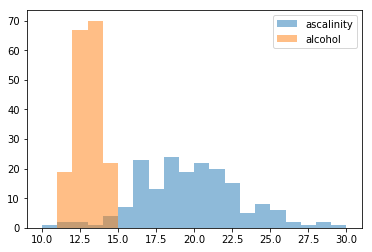

In [37]:
# TODO
# 1. Overlay histograms of the two features (alcohol, ascalinity)
bins = range(10, 31, 1)

plt.hist(ascalinity, label='ascalinity', alpha=0.5, bins=bins)
plt.hist(alcohol, label='alcohol', alpha=0.5, bins=bins)
plt.legend(loc='upper right')

# 2. Output count of points, as well as mean & sample standard deviation of the features
print("{} points".format(len(data)))
print("Alcohol: mean={:.5f}, std={:.5f}".format(stats.mean(alcohol), 
                                       stats.stdev(alcohol)))
print("Ascalinity: mean={:.5f}, std={:.5f}".format(stats.mean(ascalinity), 
                                          stats.stdev(ascalinity)))

# 2. Distance Metrics
* Implement the sse function and the general minkowski distance function

In [38]:
# TODO
# returns the sum-squared-error between two points
def sse(x1, x2):
    return sum([(n1 - n2)**2 for n1, n2 in zip(x1, x2)])
        

In [39]:
# TODO
# returns the minkowski distance between x1 and x2
def minkowski_distance(x1, x2, q):
    return sum([abs(n1 - n2)**q for n1, n2 in zip(x1, x2)])**(1/q)

In [40]:
# returns the L2 distance from x1 to x2
def euclidean_distance(x1, x2):
    return minkowski_distance(x1, x2, 2)

In [41]:
# returns the L1 distance from x1 to x2
def manhattan_distance(x1, x2):
    return minkowski_distance(x1, x2, 1)

In [42]:
t1 = [0,0]
t2 = [3,4]

print("SSE {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, sse(t1, t2), 25.))

print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, euclidean_distance(t1, t2), 5.))
print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, euclidean_distance(t2, t1), 5.))

print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, manhattan_distance(t1, t2), 7.))
print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, manhattan_distance(t2, t1), 7.))

SSE [0, 0] -> [3, 4] = 25.00000, expected=25.00000
Euclidean [0, 0] -> [3, 4] = 5.00000, expected=5.00000
Euclidean [3, 4] -> [0, 0] = 5.00000, expected=5.00000
Manhattan [0, 0] -> [3, 4] = 7.00000, expected=7.00000
Manhattan [3, 4] -> [0, 0] = 7.00000, expected=7.00000


# 3. K-Means
* Implement choose_cluster (find the closest centroid w.r.t. a distance metric)
* Implement k-means
* Respond to a question regarding plotted clusterings

In [43]:
# TODO
# Inputs: centroid locations, point, distance metric
# Outputs: centroid index that is closest
def choose_cluster(centroids, x, distance_metric):
    min_centroid_index = 0
    min_dist_to_centroid = float("inf")
    for i, centroid in enumerate(centroids):
        d = distance_metric(centroid, x)
        if d < min_dist_to_centroid:
            min_dist_to_centroid = d
            min_centroid_index = i
    return min_centroid_index

In [44]:
# Inputs: list of data points
# Outputs: arithmetic mean of the given datapoints
def points_avg(data_points):
    x_avg = sum(point[0] for point in data_points)/len(data_points)
    y_avg = sum(point[1] for point in data_points)/len(data_points)
    return (x_avg, y_avg)

def points_sse(points1, points2):
    sse = 0
    for p1, p2 in zip(points1, points2):
        d = euclidean

# TODO
# Inputs: 
#  initial_centroids: locations (length=K)
#  data: data points (length=N)
#  distance_metric: how to select the closest point in the e-step
# 
# Outputs:
#  centroids: locations (length=K)
#  new_clusters: for each data point, index of associated cluster
#  iterations: count of iterations taken
#  total_sse: SSE of final clustering
def kmeans(initial_centroids, data, distance_metric):
    centroids = initial_centroids[:]
    new_clusters = [-1] * len(data)
    iterations = 0
    total_sse = 0
    
    old_centroids = [(0, 0) * len(centroids)]
    while(old_centroids != centroids):
        old_centroids = centroids[:]
        iterations += 1
        # E step
        for i, point in enumerate(data):
            new_clusters[i] = choose_cluster(old_centroids, point, distance_metric)
        # M step
        for i, centroid in enumerate(old_centroids):
            data_indices = [d_index for d_index, c_index in enumerate(new_clusters) if c_index == i]
            centroids[i] = points_avg([data[d_index] for d_index in data_indices])
            
    # Computing SSE
    for d_point, c_point in zip(data, [centroids[c_index] for c_index in new_clusters]):
        total_sse += sse(d_point, c_point)
    
    return centroids, new_clusters, iterations, total_sse

In [45]:
def cluster_plot(centroids, data, clustering):
    for i,c in enumerate(centroids):
        points = [data[idx] for idx,c in enumerate(clustering) if c == i]
        plt.scatter([d[0] for d in points], [d[1] for d in points], label="{}".format(i))
        plt.plot(c[0], c[1], 'kx', mew=5, ms=10)

In [46]:
initial_centroids = [data[175], data[25], data[67]]

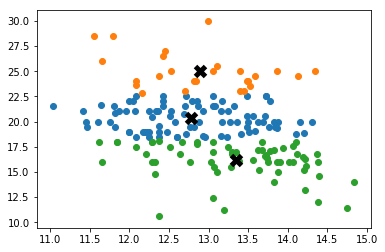

In [47]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, euclidean_distance)
cluster_plot(centroids, data, clustering)

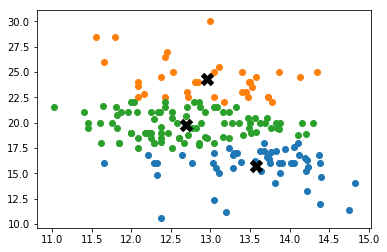

In [48]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, manhattan_distance)
cluster_plot(centroids, data, clustering)

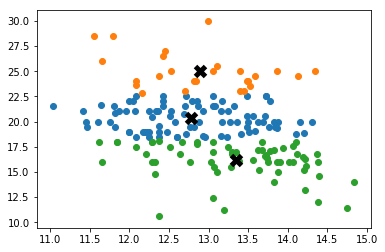

In [49]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, lambda x,y: minkowski_distance(x, y, 3))
cluster_plot(centroids, data, clustering)

## Q: What conclusion can you draw from these plots?
TODO: respond here

# 4. Choosing K
* Runs several trials of K-Means with different initial points (Forgy), recording SSE
* Plot SSE vs K
* Respond to the question below

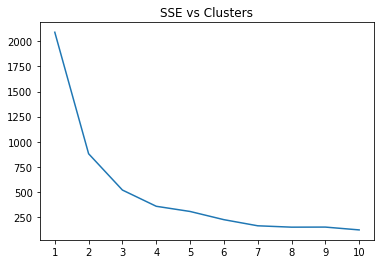

In [50]:
max_clusters = 10
trials = 5

clusters = []
sses = []

random.seed(8675309)

len(data)
# TODO
# 1. Perform 5 trials (randomizing initial points ala Forgy) for each of K=1, 2, ... 10
for k in range(1, max_clusters + 1):
    clusters.append(k)
    total_sse_k = []
    initial_centroids = [data[rand_i] for rand_i in [random.randint(0, len(data) - 1) for i in range(k)]]
    for trial in range(1, trials + 1):
        _, _, _, sse_k_trial = kmeans(initial_centroids, data, euclidean_distance)
        total_sse_k.append(sse_k_trial)
    sses.append(stats.mean(total_sse_k))


# 2. Plot SSE vs K
    
plt.plot(clusters, sses)
plt.xticks(range(1, len(clusters)+1, 1))
plt.title('SSE vs Clusters')

## Q: What is a reasonable value for K based upon this data -- why?
TODO: respond here

##### Homework 2 Part 2

## 1. K Means

In [51]:
# Data
dataset = [(4, 9), (2, 10), (1, 2), (2, 5), (6, 4), (8, 4), (7, 5), (5, 8)]
initial_centroids = [(2, 10), (1, 2), (5, 8)]

In [52]:
def kmeans_p2(initial_centroids, data, distance_metric):
    centroids = initial_centroids[:]
    new_clusters = [-1] * len(data)
    iterations = 0
    total_sse = 0
    
    old_centroids = [(0, 0) * len(centroids)]
    while(old_centroids != centroids):
        old_centroids = centroids[:]
        iterations += 1
        
        # E step
        for i, point in enumerate(data):
            new_clusters[i] = choose_cluster(old_centroids, point, distance_metric)
        # M step
        for i, centroid in enumerate(old_centroids):
            data_indices = [d_index for d_index, c_index in enumerate(new_clusters) if c_index == i]
            centroids[i] = points_avg([data[d_index] for d_index in data_indices])
        
        if(iterations == 1):
            print("Clusters: {}".format(new_clusters))
            print("Centroids: {}".format(centroids))
            
        # Plot step
        cluster_plot_p2(iterations, centroids, data, new_clusters)
    
    # Computing SSE
    for d_point, c_point in zip(data, [centroids[c_index] for c_index in new_clusters]):
        total_sse += sse(d_point, c_point)
    
    return centroids, new_clusters, iterations, total_sse

def cluster_plot_p2(iteration, centroids, data, clustering):
    fig = plt.figure()
    for i,c in enumerate(centroids):
        points = [data[idx] for idx,c in enumerate(clustering) if c == i]
        plt.scatter([d[0] for d in points], [d[1] for d in points], label="{}".format(i))
        plt.title("Iteration: {}".format(iteration))
        plt.plot(c[0], c[1], 'kx', mew=5, ms=10)
        plt.xticks([n for n in range(0, 11, 1)])
        plt.yticks([n for n in range(1, 12, 1)])
        plt.grid()
        plt.savefig("iteration_{}.png".format(iteration))
        

Clusters: [2, 0, 1, 1, 2, 2, 2, 2]
Centroids: [(2.0, 10.0), (1.5, 3.5), (6.0, 6.0)]


([(3.6666666666666665, 9.0), (1.5, 3.5), (7.0, 4.333333333333333)],
 [0, 0, 1, 1, 2, 2, 2, 0],
 4,
 14.333333333333334)

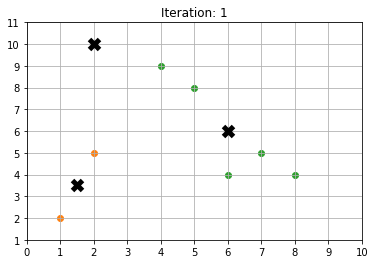

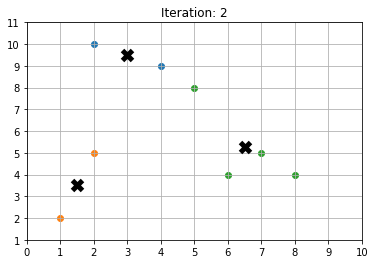

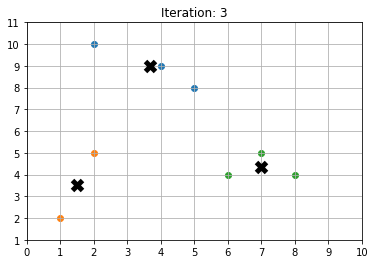

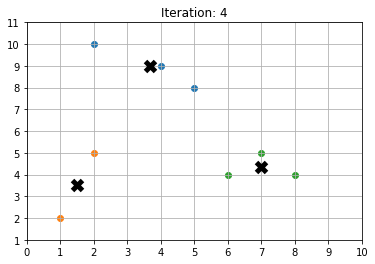

In [53]:
# Iteration 1:

# E Step
# print([euclidean_distance(point, initial_centroids[0]) for point in dataset])
# print([euclidean_distance(point, initial_centroids[1]) for point in dataset])
# print([euclidean_distance(point, initial_centroids[2]) for point in dataset])

# M Step
# print([choose_cluster(initial_centroids, point, euclidean_distance) for point in dataset])
# print(points_avg([(2, 10)]))
# print(points_avg([(1, 2), (2, 5)]))
# print(points_avg([(4, 9), (6, 4), (8, 4), (7, 5), (5, 8)]))

# centroids, clustering, iterations, total_sse = 
kmeans_p2(initial_centroids, dataset, euclidean_distance)

In [54]:
# 
p1 = (0.40, 0.53)
p2 = (0.21, 0.38)
p3 = (0.35, 0.32)
p4 = (0.26, 0.19)
p5 = (0.08, 0.41)
p6 = (0.45, 0.30)

euclidean_distance(p4, p2)

0.19646882704388502

In [60]:
stats.mean([euclidean_distance(p5, p3), euclidean_distance(p5, p6)])

0.3353050853637649

# Part 2, Question 3

In [ ]:

def dbscan_plot(iteration, centroids, data, clustering):
    fig = plt.figure()
    for i,c in enumerate(centroids):
        points = [data[idx] for idx,c in enumerate(clustering) if c == i]
        plt.scatter([d[0] for d in points], [d[1] for d in points], label="{}".format(i))
        plt.title("Iteration: {}".format(iteration))
        plt.plot(c[0], c[1], 'kx', mew=5, ms=10)